# Research Assignment 5 


Emily Ernst



[date]

In [1]:
set more off 
use "/Users/emilyernst/Desktop/garden/soc_211_assignments/potentialdata/GSS2022.dta" , clear

In [2]:
keep physhlth realinc hrs1

In [3]:
ds

hrs1      physhlth  realinc


In [4]:
// Turning dependent variable into dummy/dichotomous variable

tab physhlth, missing nol


    days of |
       poor |
   physical |
health past |
    30 days |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,212       34.20       34.20
          1 |         94        2.65       36.85
          2 |        144        4.06       40.91
          3 |         94        2.65       43.57
          4 |         43        1.21       44.78
          5 |         87        2.45       47.23
          6 |         13        0.37       47.60
          7 |         40        1.13       48.73
          8 |          9        0.25       48.98
          9 |          1        0.03       49.01
         10 |         51        1.44       50.45
         12 |          2        0.06       50.51
         13 |          1        0.03       50.54
         14 |         16        0.45       50.99
         15 |         24        0.68       51.66
         16 |          3        0.08       51.75
         17 |          1        0.03       51.78
         20 

In [5]:
drop if physhlth==.d | physhlth==.i | physhlth==.n | physhlth==.s

(1,622 observations deleted)


In [6]:
gen poor_health=physhlth

In [7]:
replace poor_health=1 if physhlth>=15
replace poor_health=0 if physhlth<15

(115 real changes made)
(595 real changes made)


In [10]:
tab physhlth poor_health, missing


days of poor physical |      poor_health
  health past 30 days |         0          1 |     Total
----------------------+----------------------+----------
                    0 |     1,212          0 |     1,212 
                    1 |        94          0 |        94 
                    2 |       144          0 |       144 
                    3 |        94          0 |        94 
                    4 |        43          0 |        43 
                    5 |        87          0 |        87 
                    6 |        13          0 |        13 
                    7 |        40          0 |        40 
                    8 |         9          0 |         9 
                    9 |         1          0 |         1 
                   10 |        51          0 |        51 
                   12 |         2          0 |         2 
                   13 |         1          0 |         1 
                   14 |        16          0 |        16 
                   15 |         

In [13]:
label variable poor_health "Experienced poor days of health for more than half the month"
label define poor_health 0 "Less than half the month" 1 "More than half the month"

In [14]:
label values poor_health poor_health

In [15]:
codebook poor_health


-------------------------------------------------------------------------------
poor_health        Experienced poor days of health for more than half the month
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: poor_health

                 Range: [0,1]                         Units: 1
         Unique values: 2                         Missing .: 0/1,922

            Tabulation: Freq.   Numeric  Label
                        1,807         0  Less than half the month
                          115         1  More than half the month


In [19]:
// Taking a quick look at my independent variables
tab poor_health
tab realinc
tab hrs1


Experienced poor days of |
    health for more than |
          half the month |      Freq.     Percent        Cum.
-------------------------+-----------------------------------
Less than half the month |      1,807       94.02       94.02
More than half the month |        115        5.98      100.00
-------------------------+-----------------------------------
                   Total |      1,922      100.00

  family income in constant $ |      Freq.     Percent        Cum.
------------------------------+-----------------------------------
                          218 |         10        0.57        0.57
                          872 |         10        0.57        1.14
                         1526 |          5        0.28        1.42
                         1962 |          2        0.11        1.54
                         2398 |          8        0.46        1.99
                         2834 |          6        0.34        2.34
                         3270 |          3      

In [48]:
tab hrs1, missing nol


  number of |
      hours |
worked last |
       week |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         19        0.99        0.99
          1 |          2        0.10        1.09
          2 |          1        0.05        1.14
          3 |          1        0.05        1.20
          4 |          6        0.31        1.51
          5 |          5        0.26        1.77
          6 |          5        0.26        2.03
          7 |          3        0.16        2.19
          8 |          6        0.31        2.50
          9 |          2        0.10        2.60
         10 |         20        1.04        3.64
         11 |          3        0.16        3.80
         12 |         13        0.68        4.47
         14 |          5        0.26        4.73
         15 |         22        1.14        5.88
         16 |         13        0.68        6.56
         17 |          2        0.10        6.66
         18 |         11  

In [53]:
//cleaning of missing values
gen cleaned_hrs1=hrs1
replace cleaned_hrs1=. if hrs1==.d | hrs1==.i | hrs1==.n | hrs1==.s

(94 missing values generated)
(94 real changes made, 94 to missing)


In [56]:
/*cleaning the income variable to create ordinal measure:
1: Not working
2: Part-time
3: Full-time
4: Over-time/Second job*/

gen wrkstatus=cleaned_hrs1
replace wrkstatus=1 if cleaned_hrs1==0

(94 missing values generated)
(19 real changes made)


In [57]:
replace wrkstatus=2 if cleaned_hrs1>=1 & cleaned_hrs1<=39

(475 real changes made)


In [58]:
replace wrkstatus=3 if hrs1==40

(730 real changes made)


In [59]:
replace wrkstatus=4 if hrs1>=41

(697 real changes made)


In [62]:
tab realinc


  family income in constant $ |      Freq.     Percent        Cum.
------------------------------+-----------------------------------
                          218 |         10        0.57        0.57
                          872 |         10        0.57        1.14
                         1526 |          5        0.28        1.42
                         1962 |          2        0.11        1.54
                         2398 |          8        0.46        1.99
                         2834 |          6        0.34        2.34
                         3270 |          3        0.17        2.51
                         3924 |         10        0.57        3.08
                         4905 |         20        1.14        4.22
                         5995 |         18        1.03        5.24
                         7085 |         18        1.03        6.27
                         8175 |         23        1.31        7.58
                         9265 |         37        2.11       

(bin=32, start=218, width=4519.2946)


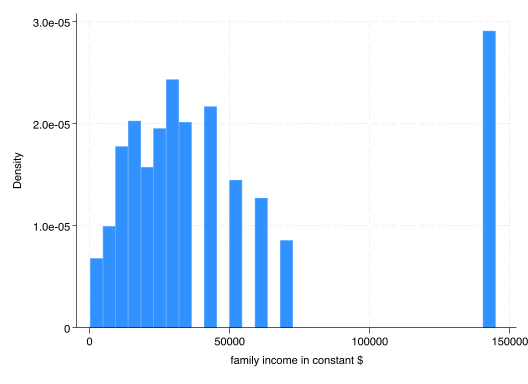

In [63]:
histogram realinc

In [65]:
//Cleaning income variable to ordinal level of measurement
//1: low-income
//2: middle class
//3: upper middle class
//4: wealthy

gen class_status=realinc
replace class_status=1 if realinc<25000


(167 missing values generated)
(715 real changes made)


In [66]:
replace class_status=2 if realinc>=25000 & realinc<=40000
replace class_status=3 if realinc>40000 & realinc<=70000
replace class_status=4 if realinc>70000 

(353 real changes made)
(456 real changes made)
(398 real changes made)


In [68]:
label variable class_status "Financial Status"
label define class_status 1 "Low-income" 2 "Middle" 3 "Upper-Middle" 4 "Wealthy"
label values class_status class_status

In [69]:
codebook class_status


-------------------------------------------------------------------------------
class_status                                                   Financial Status
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: class_status

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 0/1,922

            Tabulation: Freq.   Numeric  Label
                          715         1  Low-income
                          353         2  Middle
                          456         3  Upper-Middle
                          398         4  Wealthy



Do the following when you write your hypothesis:

    A. Write a separate hypothesis for each dependent variable (DV) you want to analyze.
    
    B. For each dependent variable (DV) state the predicted direction of association between your dependent variable DV and independent variables (IVs) in your model. You can predict no relationship if you do not expect a relationship.
    
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions

In [ ]:
/*A. I hypothesize that the lower your financial status, measured by household income and hours worked per week, ///
is associated with experiencing poor health, measured by days of poor health in a month.*/

In [ ]:
/*B. I predict there will be a negative association between financial status and poor physical health.  */

In [ ]:
/*C. This hypothesis is based on Fundamental Cause Theory that has established multiple factors of SES being associated ///
with poorer health outcomes due to occupational hazards. These indicators will capture economic, rather than a comprehensive, ///
intersectional view of social location that intersect with multiple systems of racial and gender oppression. But, we can ///
parse out the effect of income and working hours with this model.*/

### 2. Test your hypotheses [3 pts]

    A. Create a frequency table for your dependent variable (DV).

    B. Estimate an OLS model regressing your dichotomous dependent variable (DV) on your hypothesized independent variables (IVs) and store the results.
    
    C. Estimate an MLE logistic model regressing your dichotomous dependent variable (DV) on your hypothesized independent variables (IVs) and store the results.
    
    D. Use esttab to output the coefficients for your OLS and MLE logistic models with html formatting within your Jupyter Notebook.
    
    E. Use esttab to reoutput your coefficients as odd ratios.

In [20]:
//A:
tab poor_health


Experienced poor days of |
    health for more than |
          half the month |      Freq.     Percent        Cum.
-------------------------+-----------------------------------
Less than half the month |      1,807       94.02       94.02
More than half the month |        115        5.98      100.00
-------------------------+-----------------------------------
                   Total |      1,922      100.00


In [88]:
// Clearing stored estimates

est clear

In [89]:
//B: Estimating an OLS model and storing results
// Use "ro", short for robust, to get robust standard errors

eststo: reg poor_health i.class_status i.wrkstatus, ro


Linear regression                               Number of obs     =      1,922
                                                F(6, 1915)        =       2.95
                                                Prob > F          =     0.0072
                                                R-squared         =     0.0134
                                                Root MSE          =     .23601

------------------------------------------------------------------------------
             |               Robust
 poor_health | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
class_status |
     Middle  |  -.0283195   .0157152    -1.80   0.072    -.0591403    .0025013
Upper-Mid~e  |  -.0397914   .0142398    -2.79   0.005    -.0677186   -.0118642
    Wealthy  |   -.046003   .0141222    -3.26   0.001    -.0736995   -.0183065
             |
   wrkstatus |
          2  |  -.1393157   .0919837    -1.51   

In [90]:
//C: Estimating an MLE logistic model and storing results
// Using "ro" again to get robust standard errors

eststo: logit poor_health i.class_status i.wrkstatus, ro
eststo: margins, dydx(*) post atmeans


Iteration 0:  Log pseudolikelihood = -435.35061  
Iteration 1:  Log pseudolikelihood = -427.29651  
Iteration 2:  Log pseudolikelihood =  -423.8572  
Iteration 3:  Log pseudolikelihood = -423.85247  
Iteration 4:  Log pseudolikelihood = -423.85247  

Logistic regression                                     Number of obs =  1,922
                                                        Wald chi2(6)  =  21.40
                                                        Prob > chi2   = 0.0016
Log pseudolikelihood = -423.85247                       Pseudo R2     = 0.0264

------------------------------------------------------------------------------
             |               Robust
 poor_health | Coefficient  std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
class_status |
     Middle  |  -.4423677    .270461    -1.64   0.102    -.9724615    .0877261
Upper-Mid~e  |  -.6872174   .2698844    -2.55   0.011    -1.2161

In [94]:
*** PART D: Outputting Table Results

esttab ///
, cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
	legend starlevels(^ .1 * .05 ** .01 *** .001) ///
mlabels("OLS" "MLE / logistic" "MLE marginal effects") title("Unexpontiated Coefficients") ///
collabels(none) keep (2.class_status 4.wrkstatus _cons)



Unexpontiated Coefficients
---------------------------------------------------------------
                      (1)              (2)              (3)    
                      OLS     MLE / logi~c     MLE margin~s    
---------------------------------------------------------------
main                                                           
2.class_st~s        -0.03 ^          -0.44            -0.03 ^  
                   (0.02)           (0.27)           (0.02)    
4.wrkstatus         -0.15            -1.37 *          -0.14 ^  
                   (0.09)           (0.55)           (0.09)    
_cons                0.23 *          -0.94 ^                   
                   (0.09)           (0.55)                     
---------------------------------------------------------------
N                    1922             1922             1922    
---------------------------------------------------------------
^ p<.1, * p<.05, ** p<.01, *** p<.001


### 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. How would you interpret the relationship between your dependent variable(s) (DVs) and independent variables (IVs) based on the odds ratios for you MLE logistic model?
    
The odds of experiencing more than half a month of poor health is 1.03% less for people who are classified as lower-class compared to those in other classes. The odds of experiencing poor health is -1.14% for those who work more than 40 hours a week compared to those who don't.  

    B. Do the overall estimates support or contradict your hypotheses? Why?
These estimates provides some support my hypotheses because there is a negative association found in my models' odds ratio models for those who are in lower-class and working-class groups and their poor health. 
    
    C. Is there anything suprising in your model estimates? Why?
The surprising thing to me are the probability values I received for these estimates. I figured that this model was not intersectional enough to capture much statistical significance between the liminal measures of SES and health quality.
    
    D. How do the OLS coefficients and their standard errors compare to the MLE estimates? Are the coefficients and standard errors larger or smaller?

The magnitude, direction, and standard errors of my findings are comparable between the OLS and MLE models. There appears to be virtually no difference in the results, aside from the .01 difference observed in wrkstatus in the robust MLE model.